# Lab session: Ensemble Methods


This lab is about Ensemble Methods (Random Forest, AdaBoost), and we start by learning the basics of trees because they are the building blocks of ensembles

### Objective

1. Understand how the Tree-Based Methods works.

2. Implement the different algorithms.

3. Evaluate the performance of models and compare.


**Tree-based methods** are a class of supervised learning algorithms that use a tree like model of decisions. These methods are used for both classification  and regression and based on a divide approach, splitting the dataset into smaller subsets recursively.



### Key Idea Behind Tree-Based Methods
The idea is to partition the dataset into regions where the response variable is as homogeneous as possible. This is achieved by:

1. **Splitting** the data based on conditions (e.g., $ x \leq t $ where $ t $ is a threshold).

2. Repeating the splitting recursively until a stopping condition is met.

3. Assigning a prediction (class label or mean value) to the regions created.



### How Does a Decision Tree Decide Where to Split?

1. Iterate Over All Features:

   - The algorithm examines each feature in the dataset.

   - For each feature, it evaluates all possible thresholds or categories (for numerical or categorical features, respectively).

2. Evaluate Each Split:

   - For numerical features: It tries splitting at every unique value of the feature.

   - For categorical features: It considers separating groups of categories.

3. Compute a Splitting Criterion:
   - The algorithm calculates a **metric** to measure how good each split is. Common metrics include:

     - **Gini Index** (used in classification):
       $$
       G = 1 - \sum_{k=1}^K p_k^2
       $$
      $ p_k $ is the proportion of samples of class $ k $ in a node.

     - **Entropy** (used in classification):
      $$
       H = -\sum_{k=1}^K p_k \log(p_k)
       $$
       Lower Gini or entropy means a purer split.
       
     - **Mean Squared Error (MSE)** (used in regression):
       $$
       MSE = \frac{1}{N} \sum_{i=1}^N (y_i - \bar{y})^2
       $$
       Minimizing MSE creates better splits for regression.

4. Select the Best Split:
   - After evaluating all splits, the algorithm chooses the one that maximizes purity (or minimizes error) according to the selected criterion.
   
   - If multiple splits are equally good, one may be chosen randomly, but this is rare.

Let's perform a **recursive split manually** based on **Feature \(X_1\)**.


| ID  | Feature \(X_1\) | Feature \(X_2\) | Class \(y\) |
|:---:|:---------------:|:---------------:|:-----------:|
|  1  |        2        |        3        |      A      |
|  2  |        4        |        1        |      A      |
|  3  |        6        |        5        |      B      |
|  4  |        8        |        7        |      B      |
|  5  |       10        |        9        |      B      |

We will split the data only by **$X_1$**. The values of $X_1$ are $[2, 4, 6, 8, 10]$.

The possible split points are midpoints between consecutive values:
- $ \text{Split 1}: X_1 \leq 3 $
- $ \text{Split 2}: X_1 \leq 5 $
- $ \text{Split 3}: X_1 \leq 7 $
- $ \text{Split 4}: X_1 \leq 9 $

We calculate the **Gini Index** for each split to choose the best one.


**Later in the lab, we will use these ideas to understand ensemble models composed of many trees.**








### Tree-Based Methods in Practice

1. **Decision Trees**:
   - Decision Trees are the foundation of ensemble methods such as Random Forests and Boosting.
Before exploring these powerful ensemble techniques, we begin by understanding how a single decision tree works.

In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import  accuracy_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Create a DataFrame
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

# Display the first few rows of the DataFrame
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [2]:
iris_df.shape

(150, 5)

In [8]:


# Load dataset
X, y = iris.data, iris.target

# Split data (Training/Test)
#TO DO

# Fit Classification Tree
model = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

#Train your model
# TO DO

# Predictions and Evaluation (PREDICT AND COMPUTE THE ACCURACY SCORE)
#TO DO

#print("Accuracy:", accuracy)

# Visualize the Tree
plt.figure(figsize=(10, 6))
plot_tree(model,
          feature_names=iris.feature_names,
          class_names=iris.target_names,
          filled=True)
plt.show()


In [9]:
#y_pred

## **Tasks for classification tree**:

1. Modify the tree by using the `entropy` criterion.

2. Test the effect of maximum depth on the accuracy of the tree.

#### Regression tree

- Trees split data to minimize the error

- The terminal node represents the average value of the responses in that region.

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Generate synthetic regression data of 100 data points with 1 feature and
#1 column for target
# TO DO

# Split data
# TO DO

# Fit Regression Tree USING DecisionTreeRegressor with max_depth and random_state as components
model = DecisionTreeRegressor(max_depth=3, random_state=42)
# TO DO

# Predictions and Evaluation ( error)
# TO DO

# Visualize the Tree
plt.figure(figsize=(10, 6))
plot_tree(model, filled=True, feature_names=['Feature'], precision=2)
plt.show()




In [ ]:
# You can Plot predictions using plt.scatter for (X_test, y_test) and
# (X_test, y_pred)
plt.figure(figsize=(8, 5))
plt.scatter(X_test, y_test, label='True values')
plt.scatter(X_test, y_pred, label='Predictions')
plt.xlabel("Feature")
plt.ylabel("Target")
plt.legend()
plt.title("Regression Tree Predictions")
plt.show()


### **Tasks for regression tree**:

1. Try different depths for the tree and observe the effect on MSE.

2. Generate new synthetic data (1000 points) and repeat the analysis.

##2. **Bagging and Random Forests**:

   - Combine multiple trees for better predictions.

   - introduces randomness by choosing by selecting a random subset of features for splitting.

- For classification: Majority vote.

- For regression: Average.

So think of a random forest as a "forest" made up of many "trees" (decision trees). Each tree makes its own prediction, and the forest combines these predictions (e.g., by majority voting for classification or averaging for regression).



In [18]:
from sklearn.ensemble import RandomForestClassifier

# Example Dataset
data = {
    'Age': [25, 30, 35, 40, 45, 50, 25, 30, 35, 40],
    'Income': ['Low', 'Medium', 'Medium', 'High', 'High', 'Low',
               'Medium', 'High', 'High', 'Low'],
    'Loan Approved': [0, 0, 1, 1, 1, 0, 0, 0, 1, 1]  # 0 = No, 1 = Yes
}
df = pd.DataFrame(data)
df




,Age,Income,Loan Approved
0,25,Low,0
1,30,Medium,0
2,35,Medium,1
3,40,High,1
4,45,High,1
5,50,Low,0
6,25,Medium,0
7,30,High,0
8,35,High,1
9,40,Low,1


In [19]:
# One-hot encode categorical variables
df = pd.get_dummies(df, columns=['Income'], drop_first=True)
df

,Age,Loan Approved,Income_Low,Income_Medium
0,25,0,True,False
1,30,0,False,True
2,35,1,False,True
3,40,1,False,False
4,45,1,False,False
5,50,0,True,False
6,25,0,False,True
7,30,0,False,False
8,35,1,False,False
9,40,1,True,False


In [ ]:
# Split data
#TO DO

# Train Random Forest using RandomForestClassifier for sklearn with components:
model_rf = RandomForestClassifier(n_estimators=50, max_features='sqrt', random_state=42)
#TO DO

# Predict and Evaluate (Accuracy), also print accuracy
#TO DO

In [ ]:
# Extract a single tree from the forest
#replace model by the name of your model
single_tree = model.estimators_[2]  # Get one tree

# Plot the tree
plt.figure(figsize=(12, 8))
plot_tree(single_tree, feature_names=X.columns, class_names=['No', 'Yes'], filled=True, rounded=True)
plt.title("Tree from Random Forest")
plt.show()

### **Tasks for random forest**:

1. Compare results with a single decision tree.

2. Vary the number of estimators and max features and compare accuracy.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Train the random forest for regression using the data points you
# generate previously. print the MSE
model_rfr = RandomForestRegressor( n_estimators=100, max_features='sqrt', random_state=42)
# TO DO

## 3. Boosting for Classification and Regression

- Boosting trains models sequentially, where each model attempts to correct the errors of its predecessor. The final prediction is a weighted sum of all models' outputs.

- The weighted error of a weak learner \(m\) is defined as:

$$
e_m = \sum_{i=1}^N w_i \cdot \mathbb{1}(y_i \neq \hat{y}_i^{(m)})
$$

where $w_i$ is the weight of sample $i$, $y_i$ is the true label, $\hat{y}_i^{(m)}$ is the prediction of the $m$-th weak learner, and $\mathbb{1}(\cdot)$ is the indicator function.

- A weak learner is typically a simple model, such as a decision stump (a decision tree with only one split). Each weak learner focuses on correcting the mistakes made by previous learners to improve overall performance.


AdaBoost Classification Accuracy: 0.8300


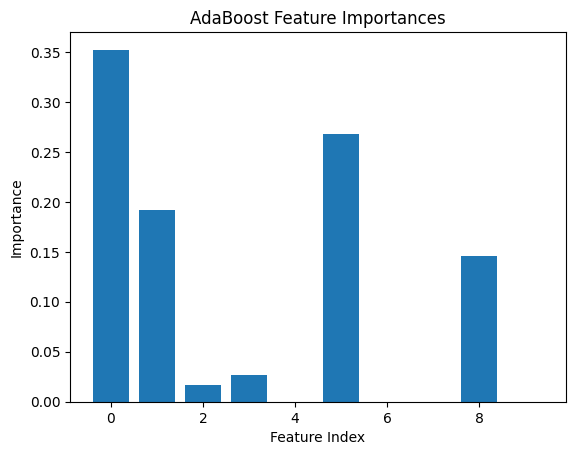

In [30]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingRegressor
from sklearn.datasets import make_classification, make_regression
from sklearn.metrics import accuracy_score, mean_squared_error

# -----------------------------
# AdaBoost for Classification
# -----------------------------
# Generate a sample classification dataset
X_class, y_class = make_classification(n_samples=500, # Number of data points (rows)
                                       n_features=10, # Total number of features (columns)
                                       n_informative=5, # Number of features that actually carry useful information for classification
                                       n_redundant=2,   # Number of features that are linear combinations of the informative ones (adds correlation)
                                       random_state=42)

# Split into train/test sets
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X_class, y_class, test_size=0.2, random_state=42
)

# Initialize AdaBoost classifier
ada_clf = AdaBoostClassifier(n_estimators=50, learning_rate=0.2, random_state=42)

# Train the classifier
ada_clf.fit(X_train_c, y_train_c)

# Make predictions
y_pred_c = ada_clf.predict(X_test_c)

# Evaluate accuracy
accuracy = accuracy_score(y_test_c, y_pred_c)
print(f"AdaBoost Classification Accuracy: {accuracy:.4f}")

feature_importances = ada_clf.feature_importances_
plt.bar(range(len(feature_importances)), feature_importances)
plt.xlabel("Feature Index")
plt.ylabel("Importance")
plt.title("AdaBoost Feature Importances")
plt.show()



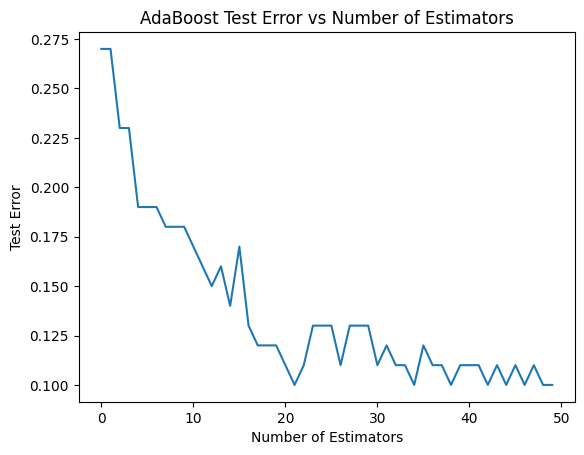

In [25]:
from sklearn.metrics import zero_one_loss

errors = [zero_one_loss(y_test_c, y_pred_iter)
          for y_pred_iter in ada_clf.staged_predict(X_test_c)]
plt.plot(errors)
plt.xlabel("Number of Estimators")
plt.ylabel("Test Error")
plt.title("AdaBoost Test Error vs Number of Estimators")
plt.show()

In [33]:
# -----------------------------
# Gradient Boosting for Regression
# -----------------------------
# Generate a sample regression dataset
X_reg, y_reg = make_regression(n_samples=500, n_features=10, noise=10.0, random_state=42)

# Split into train/test sets
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42)

# Initialize Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.7, random_state=42)

# Train the regressor
gbr.fit(X_train_r, y_train_r)

# Make predictions
y_pred_r = gbr.predict(X_test_r)

# Evaluate mean squared error
mse = mean_squared_error(y_test_r, y_pred_r)
print(f"Gradient Boosting Regression MSE: {mse:.4f}")




Gradient Boosting Regression MSE: 4256.4386


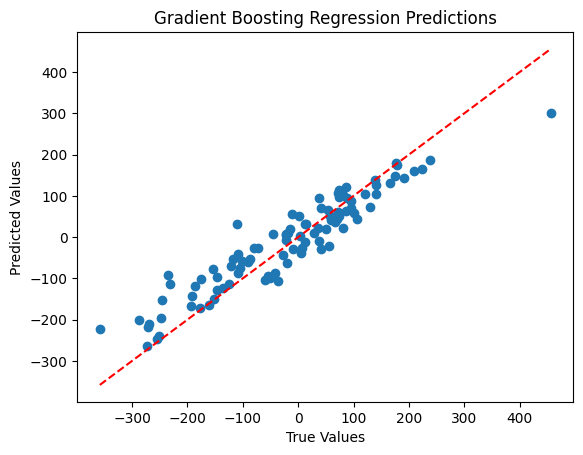

In [27]:
plt.scatter(y_test_r, y_pred_r)
plt.plot([y_test_r.min(), y_test_r.max()], [y_test_r.min(), y_test_r.max()], 'r--')
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Gradient Boosting Regression Predictions")
plt.show()


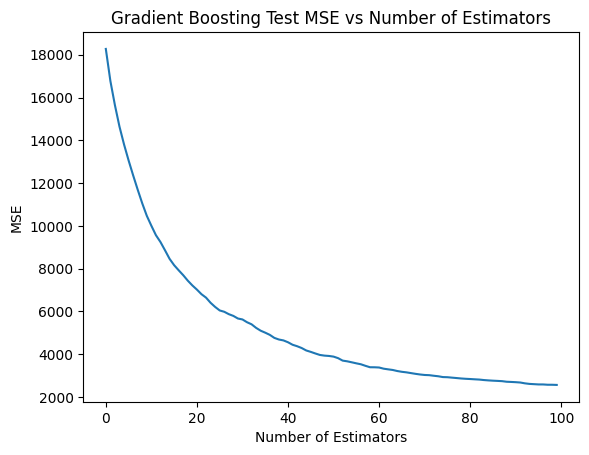

In [28]:
mse_list = [mean_squared_error(y_test_r, y_pred_iter)
            for y_pred_iter in gbr.staged_predict(X_test_r)]
plt.plot(mse_list)
plt.xlabel("Number of Estimators")
plt.ylabel("MSE")
plt.title("Gradient Boosting Test MSE vs Number of Estimators")
plt.show()

## **Tasks**:

1. Compare AdaBoost with Random Forest.

2. Experiment with learning rates in Gradient Boosting.

# **Final Task**:

Consider the data you generated for the previous assignment ( data of your project):

1. Perform classification or regression using all methods.

2. Compare their performance metrics.
   